In [647]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [648]:
data = pd.read_csv("car_prices.csv")
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [649]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [650]:
# Random 50% sample
df = data.sample(frac=0.5, random_state=42)


In [651]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
311497,2014,Chevrolet,Impala Limited,LT Fleet,Sedan,automatic,2g1wb5e37e1112559,fl,4.0,21507.0,white,black,gm remarketing,13450.0,13800.0,Mon Feb 23 2015 05:00:00 GMT-0800 (PST)
171592,2003,Dodge,Ram Pickup 1500,SLT,Quad Cab,NaN,1d7ha18n13s152972,mo,31.0,79712.0,—,black,tdaf remarketing,6025.0,6300.0,Tue Jan 20 2015 02:30:00 GMT-0800 (PST)
55288,2007,Pontiac,G6,GT,Convertible,automatic,1g2zh361474252178,nj,34.0,65698.0,red,black,car authority inc,7375.0,8000.0,Wed Jan 14 2015 01:30:00 GMT-0800 (PST)
190760,2011,Toyota,Corolla,LE,Sedan,automatic,jtdbu4eexb9167571,fl,43.0,23634.0,black,beige,world omni financial corporation,10800.0,11400.0,Tue Jan 27 2015 01:30:00 GMT-0800 (PST)
180999,2012,Lexus,ES 350,Base,Sedan,NaN,jthbk1eg6c2495519,pa,35.0,26483.0,black,brown,meridian remarketing,22500.0,23300.0,Fri Jan 30 2015 01:00:00 GMT-0800 (PST)


In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279418 entries, 311497 to 303861
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          279418 non-null  int64  
 1   make          274250 non-null  object 
 2   model         274205 non-null  object 
 3   trim          274082 non-null  object 
 4   body          272818 non-null  object 
 5   transmission  246610 non-null  object 
 6   vin           279418 non-null  object 
 7   state         279418 non-null  object 
 8   condition     273555 non-null  float64
 9   odometer      279374 non-null  float64
 10  color         279028 non-null  object 
 11  interior      279028 non-null  object 
 12  seller        279418 non-null  object 
 13  mmr           279402 non-null  float64
 14  sellingprice  279414 non-null  float64
 15  saledate      279414 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 36.2+ MB


In [653]:
import datetime as dt

In [654]:
# df['year'] = pd.to_datetime(df['year'].astype(str), format='%Y')


In [655]:
invalid_dates = df[~pd.to_datetime(df['saledate'], errors='coerce').notna()]
print(invalid_dates)


        year        make    model                    trim         body  \
453794  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
444501  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
497008  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
548784  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
501455  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
434424  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
408161  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
529013  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
457035  2014     Hyundai  Elantra                      SE        Sedan   
543129  2014     Hyundai   Accent                     GLS        sedan   
520461  2015  Volkswagen    Jetta  SE PZEV w/Connectivity  Navitgation   
406524  2013    Chrysler      300                    Base        Sedan   
427040  2015  Volkswagen    Jetta  SE 

In [656]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True).dt.date


In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279418 entries, 311497 to 303861
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          279418 non-null  int64  
 1   make          274250 non-null  object 
 2   model         274205 non-null  object 
 3   trim          274082 non-null  object 
 4   body          272818 non-null  object 
 5   transmission  246610 non-null  object 
 6   vin           279418 non-null  object 
 7   state         279418 non-null  object 
 8   condition     273555 non-null  float64
 9   odometer      279374 non-null  float64
 10  color         279028 non-null  object 
 11  interior      279028 non-null  object 
 12  seller        279418 non-null  object 
 13  mmr           279402 non-null  float64
 14  sellingprice  279414 non-null  float64
 15  saledate      279402 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 36.2+ MB


In [658]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
311497,2014,Chevrolet,Impala Limited,LT Fleet,Sedan,automatic,2g1wb5e37e1112559,fl,4.0,21507.0,white,black,gm remarketing,13450.0,13800.0,2015-02-22
171592,2003,Dodge,Ram Pickup 1500,SLT,Quad Cab,NaN,1d7ha18n13s152972,mo,31.0,79712.0,—,black,tdaf remarketing,6025.0,6300.0,2015-01-19


In [659]:
df['saledate'] = pd.to_datetime(df['saledate'].astype(str), format='%Y-%m-%d')

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279418 entries, 311497 to 303861
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          279418 non-null  int64         
 1   make          274250 non-null  object        
 2   model         274205 non-null  object        
 3   trim          274082 non-null  object        
 4   body          272818 non-null  object        
 5   transmission  246610 non-null  object        
 6   vin           279418 non-null  object        
 7   state         279418 non-null  object        
 8   condition     273555 non-null  float64       
 9   odometer      279374 non-null  float64       
 10  color         279028 non-null  object        
 11  interior      279028 non-null  object        
 12  seller        279418 non-null  object        
 13  mmr           279402 non-null  float64       
 14  sellingprice  279414 non-null  float64       
 15  saledate      279

In [661]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
311497,2014,Chevrolet,Impala Limited,LT Fleet,Sedan,automatic,2g1wb5e37e1112559,fl,4.0,21507.0,white,black,gm remarketing,13450.0,13800.0,2015-02-22
171592,2003,Dodge,Ram Pickup 1500,SLT,Quad Cab,NaN,1d7ha18n13s152972,mo,31.0,79712.0,—,black,tdaf remarketing,6025.0,6300.0,2015-01-19


In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279418 entries, 311497 to 303861
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          279418 non-null  int64         
 1   make          274250 non-null  object        
 2   model         274205 non-null  object        
 3   trim          274082 non-null  object        
 4   body          272818 non-null  object        
 5   transmission  246610 non-null  object        
 6   vin           279418 non-null  object        
 7   state         279418 non-null  object        
 8   condition     273555 non-null  float64       
 9   odometer      279374 non-null  float64       
 10  color         279028 non-null  object        
 11  interior      279028 non-null  object        
 12  seller        279418 non-null  object        
 13  mmr           279402 non-null  float64       
 14  sellingprice  279414 non-null  float64       
 15  saledate      279

In [663]:
df.drop(columns=['vin'], inplace=True)

In [664]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)

# Extracting useful features
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.day
df['sale_weekday'] = df['saledate'].dt.weekday

In [665]:
# Dropping the original saledate column, as it will unecessarily create noise.
df.drop(columns=['saledate'], inplace=True)

In [666]:
# Fill NaN (from NaT rows) before converting
df['sale_year'] = df['sale_year'].fillna(0).astype(int)
df['sale_month'] = df['sale_month'].fillna(0).astype(int)
df['sale_day'] = df['sale_day'].fillna(0).astype(int)
df['sale_weekday'] = df['sale_weekday'].fillna(0).astype(int)

In [667]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()
    print('-----------')

year
[2014 2003 2007 2011 2012 2005 2013 2002 2008 2015 2006 2009 1998 2004
 2010 2000 2001 1999 1996 1991 1994 1993 1995 1997 1988 1992 1989 1985
 1987 1986 1984 1990 1983]

-----------
make
['Chevrolet' 'Dodge' 'Pontiac' 'Toyota' 'Lexus' 'Honda' 'Ford' 'Jeep'
 'Mercedes-Benz' 'Hyundai' 'Mercury' 'Mazda' 'Kia' 'Nissan' 'Saturn'
 'Chrysler' 'Volvo' 'Audi' 'Infiniti' 'BMW' 'Buick' 'Volkswagen'
 'Mitsubishi' 'Subaru' 'MINI' 'Ram' 'Lincoln' 'Suzuki' 'Isuzu' 'honda'
 'GMC' 'Cadillac' 'Land Rover' nan 'chrysler' 'Scion' 'Acura' 'FIAT'
 'Porsche' 'Bentley' 'mitsubishi' 'Jaguar' 'ford' 'Saab' 'lexus' 'nissan'
 'smart' 'HUMMER' 'Oldsmobile' 'cadillac' 'dodge' 'chevrolet' 'hyundai'
 'toyota' 'volkswagen' 'acura' 'mercedes' 'porsche' 'mercury' 'Ferrari'
 'suzuki' 'mazda' 'land rover' 'Daewoo' 'Maserati' 'gmc' 'oldsmobile'
 'ford truck' 'bmw' 'Rolls-Royce' 'pontiac' 'Geo' 'landrover' 'Plymouth'
 'vw' 'subaru' 'jeep' 'buick' 'lincoln' 'audi' 'Tesla' 'Aston Martin'
 'kia' 'Lamborghini' 'ford tk' 'F

In [668]:
make_corrections = {
    "honda": "Honda",
    "ford": "Ford",
    "chevrolet": "Chevrolet",
    "toyota": "Toyota",
    "lexus": "Lexus",
    "nissan": "Nissan",
    "mitsubishi": "Mitsubishi",
    "acura": "Acura",
    "porsche": "Porsche",
    "mercedes": "Mercedes-Benz",
    "mercury": "Mercury",
    "suzuki": "Suzuki",
    "mazda": "Mazda",
    "land rover": "Land Rover",
    "landrover": "Land Rover",
    "gmc": "GMC",
    "oldsmobile": "Oldsmobile",
    "bmw": "BMW",
    "pontiac": "Pontiac",
    "plymouth": "Plymouth",
    "kia": "Kia",
    "maserati": "Maserati",
    "vw": "Volkswagen",
    "subaru": "Subaru",
    "jeep": "Jeep",
    "buick": "Buick",
    "lincoln": "Lincoln",
    "audi": "Audi",
    "ford truck": "Ford",
    "ford tk": "Ford",
    "mazda tk": "Mazda",
    "gmc truck": "GMC",
    "dot": None,  
}


df['make'] = df['make'].str.strip().str.lower().replace(make_corrections)


df['make'] = df['make'].apply(lambda x: None if pd.isna(x) else x.title())
df['make'] = df['make'].replace({
    "Bmw": "BMW",
    "Gmc": "GMC",
    "Fiat": "FIAT",
    "Mini": "MINI",
    "Hummer": "HUMMER",
    "Vw": "Volkswagen"  
})

print(df['make'].unique())


['Chevrolet' 'Dodge' 'Pontiac' 'Toyota' 'Lexus' 'Honda' 'Ford' 'Jeep'
 'Mercedes-Benz' 'Hyundai' 'Mercury' 'Mazda' 'Kia' 'Nissan' 'Saturn'
 'Chrysler' 'Volvo' 'Audi' 'Infiniti' 'BMW' 'Buick' 'Volkswagen'
 'Mitsubishi' 'Subaru' 'MINI' 'Ram' 'Lincoln' 'Suzuki' 'Isuzu' 'GMC'
 'Cadillac' 'Land Rover' None 'Scion' 'Acura' 'FIAT' 'Porsche' 'Bentley'
 'Jaguar' 'Saab' 'Smart' 'HUMMER' 'Oldsmobile' 'Ferrari' 'Daewoo'
 'Maserati' 'Rolls-Royce' 'Geo' 'Plymouth' 'Tesla' 'Aston Martin'
 'Lamborghini' 'Fisker' 'Lotus' 'Airstream']


In [669]:
df['make'].value_counts()

make
Ford             46850
Chevrolet        30294
Nissan           27027
Toyota           20092
Dodge            15533
Honda            13738
Hyundai          10868
BMW              10399
Kia               9030
Chrysler          8749
Mercedes-Benz     8618
Jeep              7719
Infiniti          7590
Volkswagen        6351
Lexus             6094
GMC               5311
Mazda             4129
Cadillac          3858
Acura             2948
Lincoln           2900
Audi              2883
Subaru            2552
Buick             2540
Ram               2306
Pontiac           2264
Mitsubishi        2178
Volvo             1936
MINI              1616
Saturn            1401
Mercury           1035
Land Rover         963
Scion              857
Jaguar             670
Porsche            658
Suzuki             541
FIAT               428
HUMMER             402
Saab               208
Smart              200
Oldsmobile         198
Isuzu              114
Maserati            71
Bentley             60
Geo   

In [670]:

df['body'] = df['body'].str.lower().str.strip()

replace_map = {
    'suv': 'SUV',
    'sedan': 'Sedan',
    'coupe': 'Coupe',
    'convertible': 'Convertible',
    'hatchback': 'Hatchback',
    'wagon': 'Wagon',
    'minivan': 'Minivan',
    'van': 'Van',
    'regular cab': 'Regular Cab',
    'regular-cab': 'Regular Cab',
    'quad cab': 'Quad Cab',
    'double cab': 'Double Cab',
    'crew cab': 'Crew Cab',
    'supercrew': 'SuperCrew',
    'supercab': 'SuperCab',
    'extended cab': 'Extended Cab',
    'access cab': 'Access Cab',
    'king cab': 'King Cab',
    'mega cab': 'Mega Cab',
    'crewmax cab': 'CrewMax Cab',
    'club cab': 'Club Cab',
    'cab plus': 'Cab Plus',
    'cab plus 4': 'Cab Plus 4',
    'xtracab': 'Xtracab',
    'transit van': 'Transit Van',
    'e-series van': 'E-Series Van',
    'promaster cargo van': 'Promaster Cargo Van',
    'cts coupe': 'CTS Coupe',
    'cts wagon': 'CTS Wagon',
    'cts-v coupe': 'CTS-V Coupe',
    'cts-v wagon': 'CTS-V Wagon',
    'tsx sport wagon': 'TSX Sport Wagon',
    'elantra coupe': 'Elantra Coupe',
    'genesis coupe': 'Genesis Coupe',
    'g sedan': 'G Sedan',
    'g coupe': 'G Coupe',
    'g convertible': 'G Convertible',
    'q60 coupe': 'Q60 Coupe',
    'q60 convertible': 'Q60 Convertible',
    'g37 coupe': 'G37 Coupe',
    'g37 convertible': 'G37 Convertible',
    'beetle convertible': 'Beetle Convertible',
    'granturismo convertible': 'GranTurismo Convertible',
    'koup': 'Koup'
}

df['body'] = df['body'].replace(replace_map)

df['body'] = df['body'].str.title()

print(df['body'].unique())


['Sedan' 'Quad Cab' 'Convertible' 'Suv' 'Van' 'Hatchback' 'Supercrew'
 'Coupe' 'Crew Cab' 'G Sedan' 'Regular Cab' 'Minivan' 'Wagon' 'Supercab'
 'G Coupe' 'Extended Cab' nan 'E-Series Van' 'Q60 Convertible' 'Q60 Coupe'
 'Double Cab' 'Cts Coupe' 'Elantra Coupe' 'Cab Plus' 'G Convertible'
 'King Cab' 'Crewmax Cab' 'Genesis Coupe' 'Access Cab' 'Koup'
 'Beetle Convertible' 'Club Cab' 'Tsx Sport Wagon' 'Transit Van'
 'Navitgation' 'Mega Cab' 'Xtracab' 'Cts-V Coupe' 'Promaster Cargo Van'
 'G37 Coupe' 'G37 Convertible' 'Cts Wagon' 'Cab Plus 4'
 'Granturismo Convertible' 'Cts-V Wagon']


In [671]:
df['transmission'].value_counts()

transmission
automatic    237831
manual         8767
sedan             7
Sedan             5
Name: count, dtype: int64

In [672]:
df.loc[df['transmission'].str.lower() == 'sedan', 'transmission'] = np.nan

In [673]:
df.loc[df['state'] == '3vwd17aj5fm219943', 'state'] = np.nan

In [674]:
df.loc[df['state'] == '3vwd17aj5fm297123', 'state'] = np.nan

In [675]:
df.loc[df['state'] == '3vwd17aj5fm273601', 'state'] = np.nan

In [676]:
df.loc[df['state'] == '3vwd17aj7fm326640', 'state'] = np.nan

In [677]:
df.loc[df['state'] == '3vwd17aj6fm231972', 'state'] = np.nan

In [678]:
df.loc[df['state'] == '3vwd17aj7fm223475', 'state'] = np.nan

In [679]:
df.loc[df['state'] == '3vwd17aj4fm201708', 'state'] = np.nan

In [680]:
df.loc[df['state'] == '3vwd17aj4fm236636', 'state'] = np.nan

In [681]:
df.loc[df['state'] == '3vwd17ajxfm315938', 'state'] = np.nan

In [682]:
df.loc[df['state'] == '3vwd17aj5fm206111', 'state'] = np.nan

In [683]:
df.loc[df['state'] == '3vwd17aj7fm218440', 'state'] = np.nan

In [684]:
df.loc[df['state'] == '3vwd17aj0fm227318', 'state'] = np.nan

In [685]:
df['state'].value_counts()

state
fl    41562
ca    36557
pa    27039
tx    22846
ga    17419
nj    13885
il    11744
nc    10911
oh    10730
tn    10370
mo     8003
mi     7776
nv     6365
va     6013
md     5489
wi     4944
mn     4654
az     4397
co     3882
wa     3702
ma     3370
ny     2843
in     2161
sc     2143
ne     2007
on     1744
pr     1388
la     1103
ms      941
ut      913
qc      657
hi      641
or      577
ab      464
nm       89
ok       40
ns       24
al       13
Name: count, dtype: int64

In [686]:
df['interior'].value_counts()

interior
black        122375
gray          89232
beige         29915
tan           21818
—              8595
brown          4363
red             666
blue            556
silver          541
off-white       225
purple          165
gold            156
white           125
green           119
burgundy         88
orange           79
yellow           10
Name: count, dtype: int64

In [687]:
df.replace('—', np.nan, inplace=True)


In [688]:
df.replace('.', 'np.nan', inplace=True)

In [689]:
df.loc[df['color'] == '4802', 'color'] = np.nan

In [690]:
df.loc[df['color'] == '6864', 'color'] = np.nan

In [691]:
df.loc[df['color'] == '14872', 'color'] = np.nan

In [692]:
df.loc[df['color'] == '721', 'color'] = np.nan

In [693]:
df.loc[df['color'] == '5705', 'color'] = np.nan

In [694]:
df.loc[df['color'] == '2846', 'color'] = np.nan

In [695]:
df.loc[df['color'] == '15719', 'color'] = np.nan

In [696]:
df.loc[df['color'] == '9837', 'color'] = np.nan

In [697]:
df.loc[df['color'] == '339', 'color'] = np.nan

In [698]:
df.loc[df['color'] == '6388', 'color'] = np.nan

In [699]:
df.loc[df['color'] == '16633', 'color'] = np.nan

In [700]:
df.loc[df['color'] == '20627', 'color'] = np.nan

In [701]:
df['interior'].value_counts()

interior
black        122375
gray          89232
beige         29915
tan           21818
brown          4363
red             666
blue            556
silver          541
off-white       225
purple          165
gold            156
white           125
green           119
burgundy         88
orange           79
yellow           10
Name: count, dtype: int64

In [702]:
df['color'].value_counts()

color
black        55632
white        53284
silver       41685
gray         41382
blue         25543
red          21905
gold          5742
green         5719
beige         4643
burgundy      4428
brown         3295
orange        1029
purple         769
off-white      701
yellow         659
charcoal       255
turquoise      109
pink            22
lime             6
Name: count, dtype: int64

In [703]:
df.isnull().sum()

year                0
make             5169
model            5213
trim             5336
body             6600
transmission    32820
state              12
condition        5863
odometer           44
color           12610
interior         8985
seller              0
mmr                16
sellingprice        4
sale_year           0
sale_month          0
sale_day            0
sale_weekday        0
dtype: int64

In [704]:
df.isnull().sum()/len(df)*100

year             0.000000
make             1.849917
model            1.865664
trim             1.909684
body             2.362053
transmission    11.745843
state            0.004295
condition        2.098290
odometer         0.015747
color            4.512952
interior         3.215612
seller           0.000000
mmr              0.005726
sellingprice     0.001432
sale_year        0.000000
sale_month       0.000000
sale_day         0.000000
sale_weekday     0.000000
dtype: float64

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279418 entries, 311497 to 303861
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          279418 non-null  int64  
 1   make          274249 non-null  object 
 2   model         274205 non-null  object 
 3   trim          274082 non-null  object 
 4   body          272818 non-null  object 
 5   transmission  246598 non-null  object 
 6   state         279406 non-null  object 
 7   condition     273555 non-null  float64
 8   odometer      279374 non-null  float64
 9   color         266808 non-null  object 
 10  interior      270433 non-null  object 
 11  seller        279418 non-null  object 
 12  mmr           279402 non-null  float64
 13  sellingprice  279414 non-null  float64
 14  sale_year     279418 non-null  int64  
 15  sale_month    279418 non-null  int64  
 16  sale_day      279418 non-null  int64  
 17  sale_weekday  279418 non-null  int64  
dtypes: f

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279418 entries, 311497 to 303861
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          279418 non-null  int64  
 1   make          274249 non-null  object 
 2   model         274205 non-null  object 
 3   trim          274082 non-null  object 
 4   body          272818 non-null  object 
 5   transmission  246598 non-null  object 
 6   state         279406 non-null  object 
 7   condition     273555 non-null  float64
 8   odometer      279374 non-null  float64
 9   color         266808 non-null  object 
 10  interior      270433 non-null  object 
 11  seller        279418 non-null  object 
 12  mmr           279402 non-null  float64
 13  sellingprice  279414 non-null  float64
 14  sale_year     279418 non-null  int64  
 15  sale_month    279418 non-null  int64  
 16  sale_day      279418 non-null  int64  
 17  sale_weekday  279418 non-null  int64  
dtypes: f

In [707]:
df.isnull().sum()/len(df)*100

year             0.000000
make             1.849917
model            1.865664
trim             1.909684
body             2.362053
transmission    11.745843
state            0.004295
condition        2.098290
odometer         0.015747
color            4.512952
interior         3.215612
seller           0.000000
mmr              0.005726
sellingprice     0.001432
sale_year        0.000000
sale_month       0.000000
sale_day         0.000000
sale_weekday     0.000000
dtype: float64

In [708]:
num = df.select_dtypes(include='number').columns.to_list()
num

['year',
 'condition',
 'odometer',
 'mmr',
 'sellingprice',
 'sale_year',
 'sale_month',
 'sale_day',
 'sale_weekday']

In [709]:
cat = df.select_dtypes(include=object).columns.to_list()
cat

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'state',
 'color',
 'interior',
 'seller']

In [710]:
df[num].describe()

,year,condition,odometer,mmr,sellingprice,sale_year,sale_month,sale_day,sale_weekday
count,279418.000000,273555.000000,279374.000000,279402.000000,279414.000000,279418.000000,279418.000000,279418.000000,279418.000000
mean,2010.040119,30.695831,68286.467896,13765.626946,13607.163811,2014.788571,3.796785,14.661131,1.472704
std,3.968062,13.378438,53391.876852,9653.741729,9718.660738,15.249534,3.229932,8.583021,1.240399
min,1983.000000,1.000000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,24.000000,28368.000000,7125.000000,6900.000000,2015.000000,1.000000,8.000000,1.000000
50%,2012.000000,35.000000,52169.000000,12300.000000,12100.000000,2015.000000,2.000000,16.000000,1.000000
75%,2013.000000,42.000000,98996.000000,18300.000000,18200.000000,2015.000000,6.000000,21.000000,2.000000
max,2015.000000,49.000000,999999.000000,178000.000000,171500.000000,2015.000000,12.000000,31.000000,6.000000


In [711]:
df[cat].describe()

,make,model,trim,body,transmission,state,color,interior,seller
count,274249,274205,274082,272818,246598,279406,266808,270433,279418
unique,54,919,1788,44,2,38,19,16,11084
top,Ford,Altima,Base,Sedan,automatic,fl,black,black,nissan-infiniti lt
freq,46850,9701,27953,120710,237831,41562,55632,122375,9834


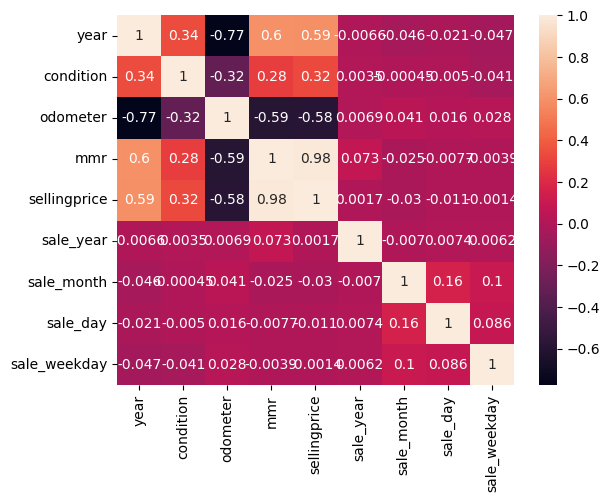

In [712]:
sns.heatmap(df[num].corr(),annot=True)
plt.show()

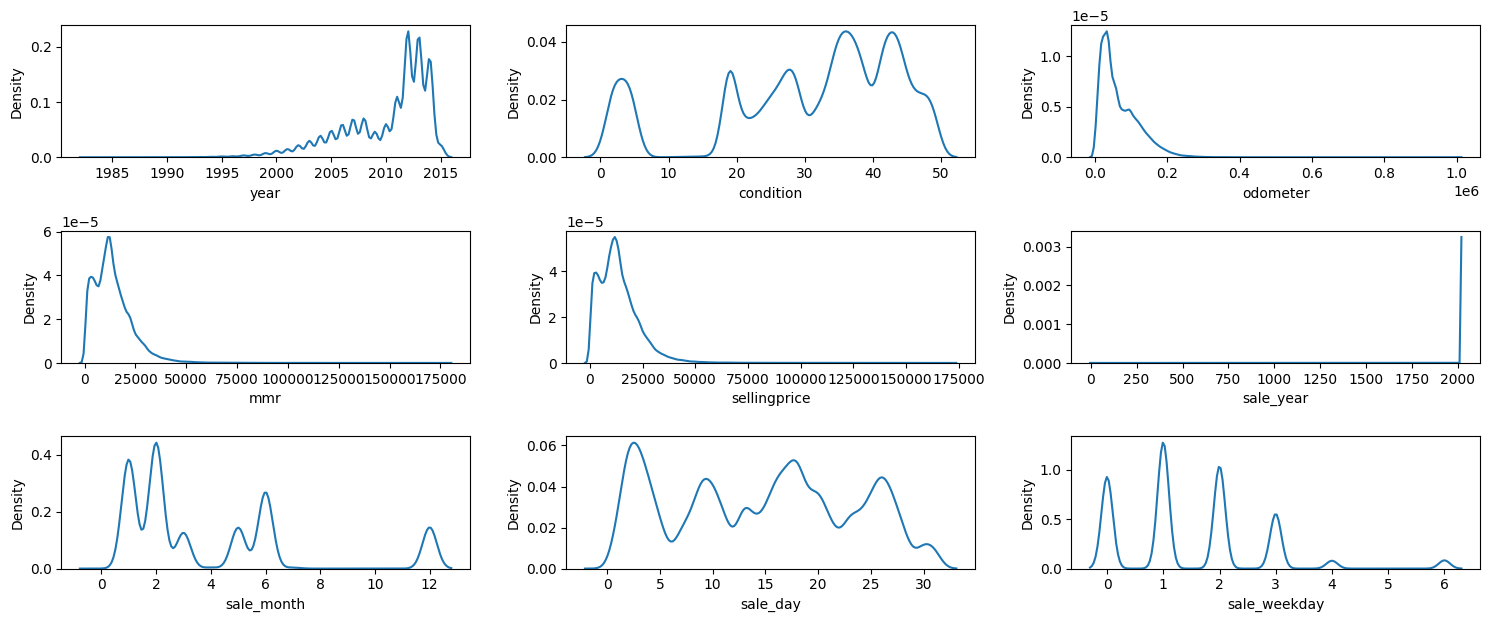

In [713]:
t=1
plt.figure(figsize=(15,10))
for i in num:
    plt.subplot(5,3,t)
    sns.kdeplot(data=df[i])
    
  
    t+=1
    
plt.tight_layout()
plt.show()

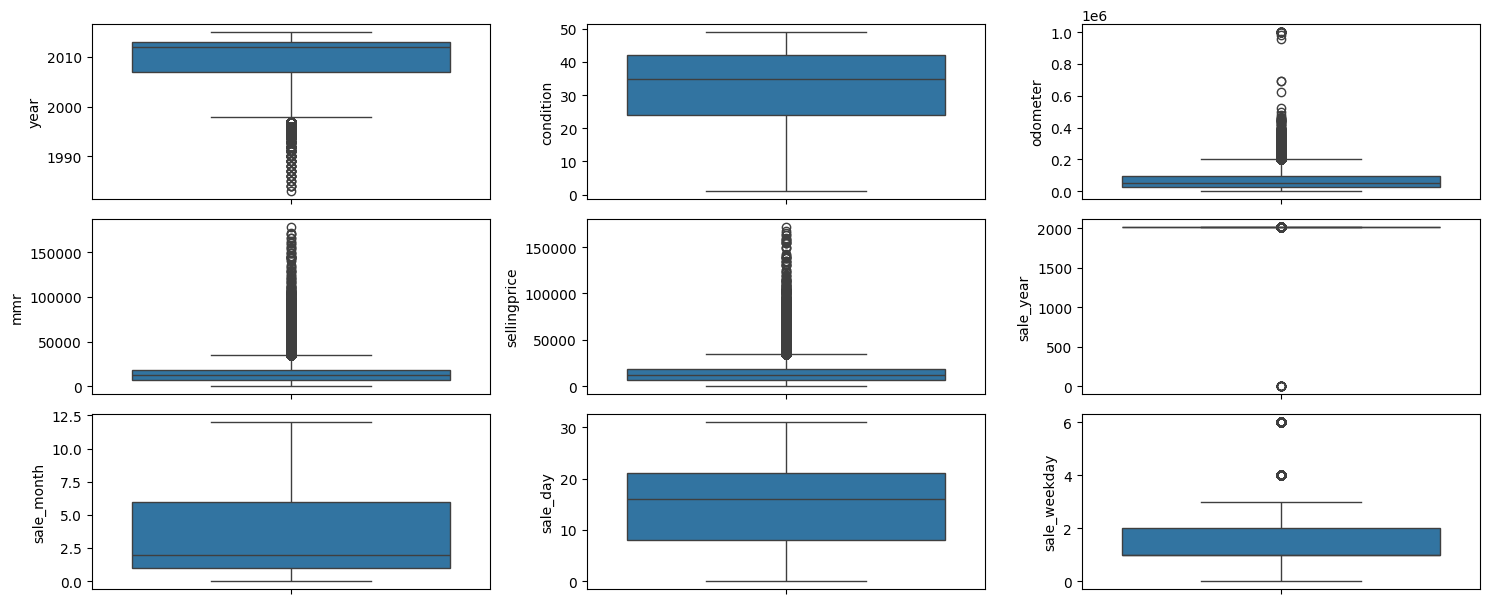

In [714]:
t=1
plt.figure(figsize=(15,10))
for i in num:
    plt.subplot(5,3,t)
    sns.boxplot(data=df[i])
  
    t+=1
    
plt.tight_layout()
plt.show()

In [715]:
num

['year',
 'condition',
 'odometer',
 'mmr',
 'sellingprice',
 'sale_year',
 'sale_month',
 'sale_day',
 'sale_weekday']

In [716]:
df['condition'].median()

35.0

In [717]:
df[num] = df[num].fillna(df[num].median())

In [718]:
df.isnull().sum()

year                0
make             5169
model            5213
trim             5336
body             6600
transmission    32820
state              12
condition           0
odometer            0
color           12610
interior         8985
seller              0
mmr                 0
sellingprice        0
sale_year           0
sale_month          0
sale_day            0
sale_weekday        0
dtype: int64

In [719]:
df['body'] = df['body'].fillna(df['body'].mode()[0])

In [720]:
df['make'] = df['make'].fillna(df['make'].mode()[0])

In [721]:
df['model'] = df['model'].fillna(df['model'].mode()[0])

In [722]:
df['trim'] = df['trim'].fillna(df['trim'].mode()[0])

In [723]:
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

In [724]:
df['color'] = df['color'].fillna(df['color'].mode()[0])

In [725]:
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

In [726]:
df['state'] = df['state'].fillna(df['state'].mode()[0])

In [727]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
sale_year       0
sale_month      0
sale_day        0
sale_weekday    0
dtype: int64

In [728]:
df.dropna(axis=0,inplace=True)

In [729]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
sale_year       0
sale_month      0
sale_day        0
sale_weekday    0
dtype: int64

In [730]:
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [731]:
stat, p = stats.shapiro(df['sellingprice'].dropna().sample(500))  # sample if large
print("\nShapiro-Wilk Test for Selling Price: p =", p)
if p > 0.05:
    print("Data looks Normal")
else:
    print("Data is NOT Normal")


Shapiro-Wilk Test for Selling Price: p = 3.670119883322431e-23
Data is NOT Normal


In [732]:
if 'odometer' in df.columns:
    corr, p = stats.pearsonr(df['sellingprice'], df['odometer'])
    print("\nPearson Correlation (sellingprice vs odometer):", corr, "p =", p)


Pearson Correlation (sellingprice vs odometer): -0.5842313188457595 p = 0.0


In [733]:
if 'make' in df.columns:
    anova_data = [group['sellingprice'].dropna() for name, group in df.groupby('make')]
    f_stat, p_val = stats.f_oneway(*anova_data)
    print("\nANOVA (sellingprice across car makes): F =", f_stat, "p =", p_val)



ANOVA (sellingprice across car makes): F = 1279.6193889746553 p = 0.0


In [734]:
if 'make' in df.columns and 'transmission' in df.columns:
    contingency = pd.crosstab(df['make'], df['transmission'])
    chi2, p, dof, exp = stats.chi2_contingency(contingency)
    print("\nChi-Square Test (make vs transmission): chi2 =", chi2, "p =", p)


Chi-Square Test (make vs transmission): chi2 = 10890.814676596876 p = 0.0


In [735]:
X = df[['mmr']]  # Example with odometer predicting price
y = df['sellingprice']

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print("\nOLS Regression Summary (Selling Price ~ Odometer):")
print(model.summary())


OLS Regression Summary (Selling Price ~ Odometer):
                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 8.504e+06
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:08:21   Log-Likelihood:            -2.4803e+06
No. Observations:              279418   AIC:                         4.961e+06
Df Residuals:                  279416   BIC:                         4.961e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [736]:

le = LabelEncoder()
for col in cat:
    df[col] = le.fit_transform(df[col])

In [737]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('sellingprice')
df[num_cols] = scaler.fit_transform(df[num_cols])

In [738]:
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Save encoders
encoders = {}
for col in cat:   # cat = list of categorical columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Save scaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('sellingprice')
df[num_cols] = scaler.fit_transform(df[num_cols])

In [739]:
X = df.drop('sellingprice', axis=1)
y = df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [740]:
summary = pd.DataFrame(columns=['R-Squre','RMSE','MAPE'])
summary.index.name = 'Model Name'

In [741]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [742]:
def metric(model,ytest,ypred):
    
    r2 = r2_score(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    mape = mean_absolute_percentage_error(ytest,ypred)
    
    
    summary.loc[model] = [r2,rmse,mape]
    
    return summary

In [743]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = model.predict(X_test)

metric('Linear Regression',y_test,y_pred)


,R-Squre,RMSE,MAPE
Model Name,,,
Linear Regression,0.97037,1664.732486,0.159826


In [744]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42, max_depth = 50, min_samples_split=30)
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test)

metric('Decision Tree',y_test,y_pred)


,R-Squre,RMSE,MAPE
Model Name,,,
Linear Regression,0.970370,1664.732486,0.159826
Decision Tree,0.966514,1769.738392,0.158846


In [745]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

metric('Random Forest',y_test,y_pred)


,R-Squre,RMSE,MAPE
Model Name,,,
Linear Regression,0.970370,1664.732486,0.159826
Decision Tree,0.966514,1769.738392,0.158846
Random Forest,0.975507,1513.554263,0.137652


In [746]:
''' from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
model = gb.fit(X_train, y_train)
y_pred = model.predict(X_test)

metric('Gradient Boosting',y_test,y_pred)
'''

" from sklearn.ensemble import GradientBoostingRegressor\ngb = GradientBoostingRegressor()\nmodel = gb.fit(X_train, y_train)\ny_pred = model.predict(X_test)\n\nmetric('Gradient Boosting',y_test,y_pred)\n"

In [747]:
''' import xgboost as xg
xgb = xg.XGBRegressor(n_estimators=1000, max_depth=6, random_state=42)
model = xgb.fit(X_train, y_train)
y_pred = model.predict(X_test)

metric('XG Boosting',y_test,y_pred)
'''

" import xgboost as xg\nxgb = xg.XGBRegressor(n_estimators=1000, max_depth=6, random_state=42)\nmodel = xgb.fit(X_train, y_train)\ny_pred = model.predict(X_test)\n\nmetric('XG Boosting',y_test,y_pred)\n"

In [748]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [8, 10],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [500, 1000]
}
grid = GridSearchCV(xg.XGBRegressor(use_label_encoder=False, eval_metric='logloss', random_state=42),
                    param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500}
Best CV score: nan


In [749]:
import xgboost as xg
xgb1 = xg.XGBRegressor(n_estimators=500, max_depth=8, random_state=42, learning_rate=0.05)
model1 = xgb1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

metric('XG Boosting1',y_test,y_pred1)

,R-Squre,RMSE,MAPE
Model Name,,,
Linear Regression,0.970370,1664.732486,0.159826
Decision Tree,0.966514,1769.738392,0.158846
Random Forest,0.975507,1513.554263,0.137652
XG Boosting1,0.974081,1557.008799,0.126506


In [750]:
''' from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=200,min_samples_split=2, random_state=42)
model2 = rf1.fit(X_train, y_train)
y_pred = model2.predict(X_test)

metric('Random Forest1',y_test,y_pred)
'''

" from sklearn.ensemble import RandomForestRegressor\nrf1 = RandomForestRegressor(n_estimators=200,min_samples_split=2, random_state=42)\nmodel2 = rf1.fit(X_train, y_train)\ny_pred = model2.predict(X_test)\n\nmetric('Random Forest1',y_test,y_pred)\n"

In [751]:
''' param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring="r2",
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_) 
'''

' param_grid = {\n    "n_estimators": [100, 200, 500],\n    "max_depth": [None, 10, 20],\n    "min_samples_split": [2, 5, 10]\n}\n\ngrid = GridSearchCV(\n    RandomForestRegressor(random_state=42, n_jobs=-1),\n    param_grid,\n    cv=3,\n    scoring="r2",\n    verbose=1,\n    n_jobs=-1\n)\n\ngrid.fit(X_train, y_train)\n\nprint("Best Parameters:", grid.best_params_)\nprint("Best CV R²:", grid.best_score_) \n'

In [753]:
make_to_models = df.groupby("make")["model"].unique().to_dict()

joblib.dump({
    "model": xgb1,
    "encoders": encoders,
    "scaler": scaler,
    "num_cols": list(num_cols),
    "cat_cols": list(cat),
    "feature_names": list(X_train.columns),
    "make_to_models": make_to_models   # add this
}, "model.pkl")


['model.pkl']